# SPRINT 5 Tarea 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Cargar los datos
ligasEU = pd.read_csv('Lligues europees UEFA.csv',sep=";", encoding='ISO-8859-1',index_col=0)
ligasEU
 

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


### Descripción de variables

| Atributo        | Descripción                                                             |
|-----------------|-------------------------------------------------------------------------|
| Rk              | Ranking, basado en Pts/G                                       |
| Squad           | Nombre del equipo                                                       |
| Country         | País                                                                    |
| LgRk            | Ranking, basado en Pts/G  por liga                                            |
| MP              | Partidos jugados                                                        |
| W               | Victorias                                                               |
| D               | Empates                                                                 |
| L               | Derrotas                                                                |
| GF              | Goles a favor                                                           |
| GA              | Goles en contra                                                         |
| GD              | Diferencia de goles                                                     |
| Pts             | Puntos                                                                  |
| Pts/G           | Media de puntos por juegos jugados                                      |
| xG              | Goles esperados                                                         |
| xGA             | Goles esperados en contra                                               |
| xGD             | Diferencia de goles esperadas( combina el xG y el xGA)                  |
| xGD/90          | Digerencia Goles esperados en 90 minutos                                           |
| Last 5          | Resultados de los ultimos 5 partidos (W=Victoria, D=Empate, L=Derrotas) |
| Attendance      | Público en estadios                                                     |
| Top Team Scorer | Goleador y sus goles                                                    |
| Goalkeeper      | Nombre Arquero / Guardameta                                             |

Observaciones iniciales:
* Importante observar que no todos los equipos han jugado el mismo número de partidos. Lo ideal será trabajar con media de medias. 

## Pre procesado de datos 
* Nulos
* Vacios 
* Duplicados
* Columnas a mantener

Como en todo ejercicio, al inicio hay que analizar el "scope" de nuestro estudio, en este caso es realizar pruebas de hipótesis de 1, 2 o hasta 3 variables. En mi caso no utilizare las siguientes columnas por lo cual se eliminaran:
* LgRk: ranking del equipo en la liga
* Last 5: ultimos 5 resultados
* Top Team Scorer: goleador del equipo
* Goalkeeper: guardameta del equipo. Adicional, en una liga puede ser que el arquero cambie, en todo caso se necesitaría más información como el número de partidos jugados y minutos para relacionarlo con los goles.

In [3]:
ligasEU =ligasEU.drop('LgRk',axis=1)
ligasEU =ligasEU.drop('Last 5',axis=1)
ligasEU =ligasEU.drop('Top Team Scorer',axis=1)
ligasEU =ligasEU.drop('Goalkeeper',axis=1)
ligasEU

,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,,,,,,,,,,,,,,,,
1,Manchester City,ENG,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,52739
2,Liverpool,ENG,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,53367
3,Real Madrid,ESP,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,40624
4,Bayern Munich,GER,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176
5,Paris S-G,FRA,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,41188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,22083
95,Venezia,ITA,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,6705
96,Watford,ENG,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,20614


In [4]:
#Nulos
ligasEU.isnull().sum()

Squad         0
Country       0
MP            0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/G         0
xG            0
xGA           0
xGD           0
xGD/90        0
Attendance    0
dtype: int64

In [5]:
#NaNs
ligasEU.isna().sum()

Squad         0
Country       0
MP            0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/G         0
xG            0
xGA           0
xGD           0
xGD/90        0
Attendance    0
dtype: int64

In [6]:
#Duplicados
ligasEU.loc[ligasEU.duplicated()]

,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,,,,,,,,,,,,,,,,


> No hay valores vacios, NANS o duplicados.

In [7]:
ligasEU.describe()

,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [14]:
# Países
ligasEU.Country.unique().tolist()

['ENG', 'ESP', 'GER', 'FRA', 'ITA']

<div class="alert alert-block alert-info">
<b>EXERCICI 1 </b> Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.  </div>

Dos de las ligas más importantes de la UEFA y del mundo son: 
* Premier League (UK)
* La Liga (ESP)

De allí, que de los últimos 12 campeonatos de la UEFA champions league 10 veces han sido ganadas por equipos ingleses o de España.

Mediante el test de hipotesis se compararán estas dos ligas mediante el atributo: 

* Pts/G  (Media de puntos por partidos jugados)

*** Un error podría haber sido comparar la columna de Pts, debido a que no todos los equipos han jugado la misma cantidad de partidos.

In [48]:
#Descripción estadística de los dos países
ligasEU[ligasEU['Country'].isin(['ESP', 'ENG'])][['Country','Pts/G']].groupby('Country').describe().T

Country            ENG        ESP
Pts/G count  20.000000  20.000000
      mean    1.381500   1.352500
      std     0.503036   0.414575
      min     0.590000   0.840000
      25%     1.082500   1.037500
      50%     1.275000   1.230000
      75%     1.635000   1.692500
      max     2.430000   2.300000

* La muestra de cada país es de 20. Es decir, n < 30 un test a utilizar puede ser el t-Student, si n > 30 podría ser el Z. Inglaterra tiene una media ligeramente superior a España y también una desviación estandar mayor.

In [50]:
#Se extraen los valores para España e Inglaterra
mean_pts_ESP= ligasEU[ligasEU['Country'].isin(['ESP'])]['Pts/G'].values
mean_pts_ENG= ligasEU[ligasEU['Country'].isin(['ENG'])]['Pts/G'].values
print(mean_pts_ESP)
print(mean_pts_ENG)

[2.3  1.97 1.84 1.81 1.73 1.68 1.51 1.49 1.27 1.24 1.22 1.14 1.11 1.05
 1.05 1.   0.97 0.97 0.86 0.84]
[2.43 2.39 1.94 1.84 1.83 1.57 1.51 1.38 1.33 1.3  1.25 1.24 1.22 1.19
 1.11 1.   0.95 0.94 0.62 0.59]


# Test a utilizar y suposiciones a determinar
Se utilizara la prueba t-student (n<30), para eso se debe determinar si:
1. Las muestras independientes siguen una distribución normal
2. Las Varianzas son iguales 

### 1. Demostrar que las muestras siguen una distribución normal

### Planteamiento de Hipótesis - Normalidad - Shapiro-Wilk (Puntos España)

> Ho: **Hipótesis nula:** La muestra de los puntos por partido de España siguen una distribución normal.

> H1: **Hipótesis alternativa:** La muestra de los puntos por patido de España NO siguen una distribución normal.

In [119]:
from scipy.stats import shapiro
stat, p = shapiro(mean_pts_ESP)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.919, p=0.095
Probably Gaussian


> **Al realizar la prueba de Shapiro-Wilk (n=20) se puede decir con un 95% de confiabilidad que la distribución de los valores de puntos por partidos en España sigue una distribución normal. A continuación, se muestra la gráfica.**

Text(0, 0.5, 'Densidad')

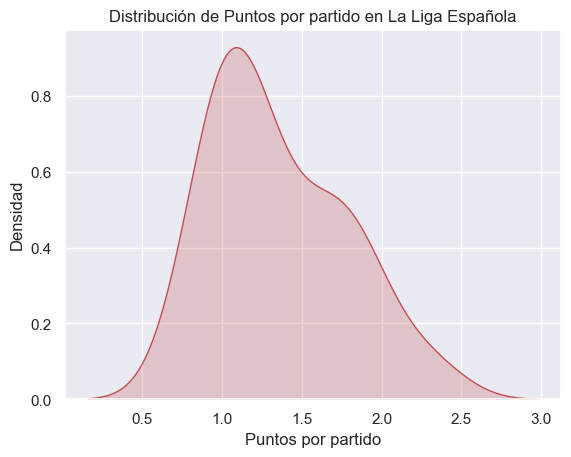

In [65]:
sns.set(style="darkgrid")
fig = sns.kdeplot(mean_pts_ESP, fill=True, color="r")
plt.title("Distribución de Puntos por partido en La Liga Española")
plt.xlabel("Puntos por partido")
plt.ylabel("Densidad")

### Planteamiento de Hipótesis - Normalidad - Shapiro-Wilk (Puntos England)

> Ho: **Hipótesis nula:** La muestra de los puntos de Inglaterra siguen una distribución normal.

> H1: **Hipótesis alternativa:** La muestra de los puntos de Inglaterra NO siguen una distribución normal.

In [52]:
stat, p = shapiro(mean_pts_ENG)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.945, p=0.295
Probably Gaussian


> **Al realizar la prueba de Shapiro-Wilk (n=20) se puede decir con un 95% de confiabilidad que la distribución de los valores de puntos por partidos en Inglaterra sigue una distribución normal. A continuación, se muestra la gráfica.**

Text(0, 0.5, 'Densidad')

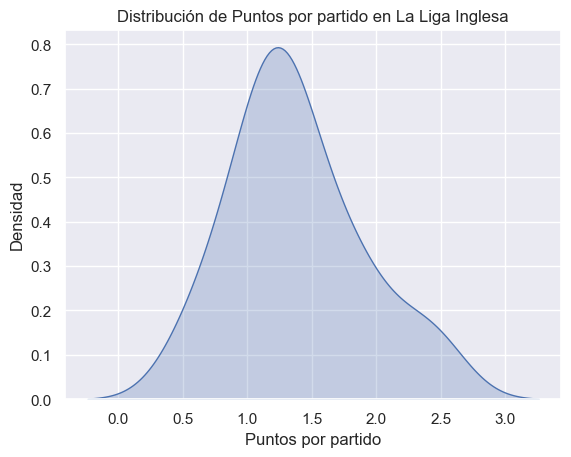

In [63]:
sns.set(style="darkgrid")
fig = sns.kdeplot(mean_pts_ENG, fill=True, color="b")
plt.title("Distribución de Puntos por partido en La Liga Inglesa")
plt.xlabel("Puntos por partido")
plt.ylabel("Densidad")

### 2. Demostrar que las muestras tienen la misma Varianza
Como las dos muestras siguen una distribución normal, se puede utilizar el test F de Fisher para comparar si las dos muestras tienen la misma varianza. Si las muestras no siguen una distribución normal se puede utilizar el test de Levene.

> Ho: **Hipótesis nula:** Las varianzas son iguales. (Muestras: promedio de puntos por partido en Inglaterra y España)

> H1: **Hipótesis alternativa:** Las varianzas NO son iguales.

In [76]:
from scipy.stats import f_oneway

# Realizar el test F de Fisher
f_value, p_value = f_oneway(mean_pts_ESP, mean_pts_ENG)

print("Estadística F:", f_value)
print("Valor p:", p_value)

alpha = 0.05  # 5%

# Verificar si se acepta o rechaza la hipótesis nula
if p_value < alpha:
    print("Se rechaza la hipótesis nula; las varianzas de las muestras son significativamente diferentes.")
else:
    print("Se acepta la hipótesis nula; no hay suficiente evidencia para concluir que las varianzas de las muestras son diferentes.")


Estadística F: 0.03958416682872099
Valor p: 0.8433565597976599
Se acepta la hipótesis nula; no hay suficiente evidencia para concluir que las varianzas de las muestras son diferentes.


> **Las dos muestras siguen una distribución normal y una varianza similar, por lo cual procedemos a realizar la prueba t-Student**

## Test t-Student para verificar si las medias de las muestras de los puntos por partido de Inglaterra y España son iguales

### Planteamiento de Hipótesis

> Ho: **Hipótesis nula:** La Media de puntos por partido en España es igual a la de Inglaterra.  

> H1: **Hipótesis alternativa:** La Media de puntos por partido en España NO es igual a la de Inglaterra.

In [77]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(mean_pts_ESP, mean_pts_ENG)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=-0.199, p=0.843
Probably the same distribution


**Con un nivel de confianza del 95% la media de puntos por partido en España e Inglaterra son iguales.**

<div class="alert alert-block alert-info">
<b>EXERCICI 2 </b> Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%. </div>

In [161]:
#Al inicio sería lógico pensar que a mayor diferencial positivo de cantidad de goles esperados cada 90 minutos más victorias debería tener el equipo, es decir una relación lineal positiva. Agregaremos una columna de (victorias / Partidos jugados) por que no todos los equipos han jugado los mismos partidos.

ligasEU['WinsxGame'] = ligasEU.W / ligasEU.MP
ligasEU

,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,WinsxGame
Rk,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,52739,0.756757
2,Liverpool,ENG,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,53367,0.722222
3,Real Madrid,ESP,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,40624,0.702703
4,Bayern Munich,GER,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,0.705882
5,Paris S-G,FRA,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,41188,0.675676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,22083,0.135135
95,Venezia,ITA,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,6705,0.162162
96,Watford,ENG,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,20614,0.162162


> Al realizar la comparativa de dos atributos es interesante realizar un heat map para observar la correlación que existen entre las variables.

<Axes: >

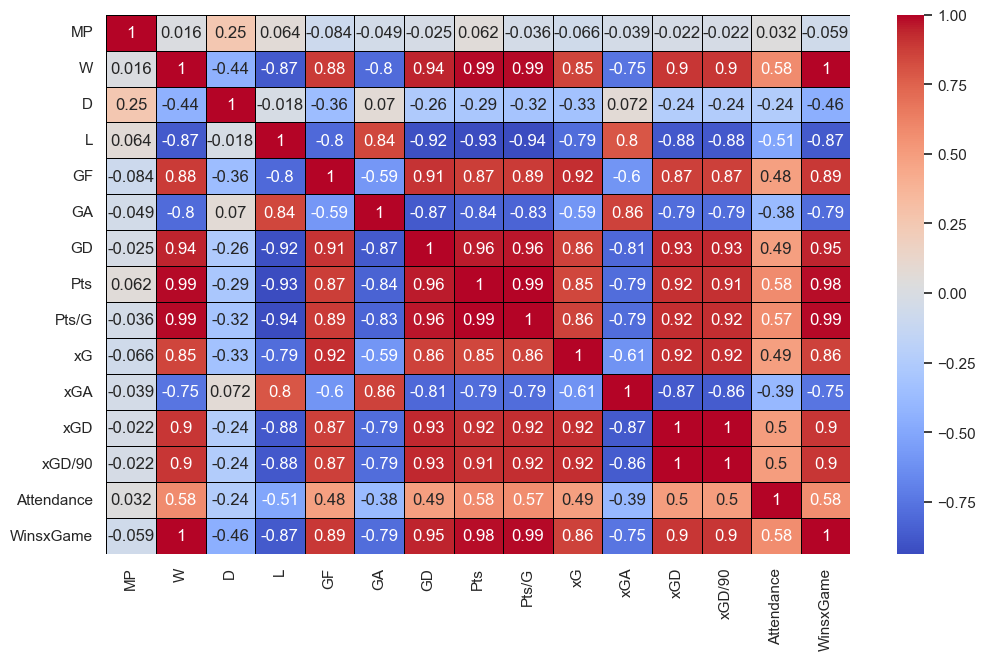

In [94]:
# Creamos el heat map
fig, ax = plt.subplots(figsize=(12,7)) 
sns.heatmap(ligasEU.corr(numeric_only=True), annot=True, linewidths=0.5, cmap="coolwarm", linecolor='black')


> **La matriz de correlaciones es múy útil para analizar u observar correlaciones de forma visual. Ahora para confirmar la relación entre dos variables númericas realizaremos un test de hipótesis de correlación. En este caso el TEST DE CORRELACIÓN DE PEARSON. Se debe comprobar de forma inicial lo siguiente en las muestras:**


* Atributos a comparar: xGD/90 VS WinsxGame(Porcentaje de victorias por juego) 
1. Las observaciones siguen una distribución normal.
2. las observaciones tienen la misma varianza.


### 1. Demostrar que las muestras siguen una distribución normal

In [157]:
xGD_90_GER= ligasEU[ligasEU['Country'].isin(['GER'])]['xGD/90'].values
WinsxGame_GER= ligasEU[ligasEU['Country'].isin(['GER'])]['WinsxGame'].values

### Planteamiento de Hipótesis - Normalidad - Anderson Darling (xGD/90)

> Ho: **Hipótesis nula:** La muestra de xGD/90 (diferncia de goles esperados en 90 minutos) de los equipos de la liga alemana siguen una distribución normal.

> H1: **Hipótesis alternativa:** La muestra de xGD/90 (goles esperados en 90 minutos) de los equipos de la liga alemana siguen una distribución normal.

In [158]:
from scipy.stats import anderson

result = anderson(xGD_90_GER)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
     print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
     print('Probably not Gaussian at the %.1f%% level' % (sl))
        

stat=0.279
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


> Utilizando un nivel de significancia alpha= 0.05 NO podemos rechazar la hipótesis nula. Por lo tanto, la se puede decir :   
**La muestra de xGD/90 (diferncia de goles esperados en 90 minutos) de los equipos de la liga alemana siguen una distribución normal.**

La media de goles a favor en la liga  0.0011


Text(0, 0.5, 'Densidad')

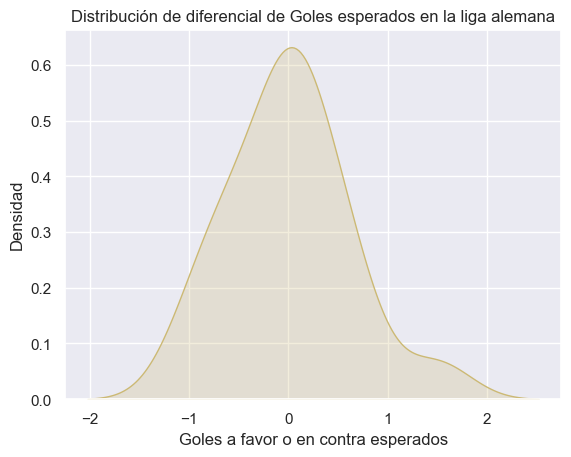

In [171]:
print('La media de goles a favor en la liga  '+ str(round(xGD_90_GER.mean(),4)))
sns.set(style="darkgrid")
fig = sns.kdeplot(xGD_90_GER, fill=True, color="y")
plt.title("Distribución de diferencial de Goles esperados en la liga alemana")
plt.xlabel("Goles a favor o en contra esperados")
plt.ylabel("Densidad")

### Planteamiento de Hipótesis - Normalidad - Anderson Darling (WinsxGame - porcentaje de partidos ganados por juegos jugados)

> Ho: **Hipótesis nula:** La muestra de WinsxGame (% de partidos ganados por juegos jugados) de los equipos de la liga alemana siguen una distribución normal.

> H1: **Hipótesis alternativa:** La muestra de WinsxGame (% de partidos ganados por juegos jugados) de los equipos de la liga alemana NO siguen una distribución normal.

In [164]:
result = anderson(WinsxGame_GER)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
     print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
     print('Probably not Gaussian at the %.1f%% level' % (sl))
        

stat=0.191
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


> Utilizando un nivel de significancia alpha= 0.05 NO podemos rechazar la hipótesis nula. Por lo tanto, la se puede decir :   
**La muestra de WinsxGame (% de partidos ganados por juegos jugados) de los equipos de la liga alemana siguen una distribución normal.**

Text(0, 0.5, 'Densidad')

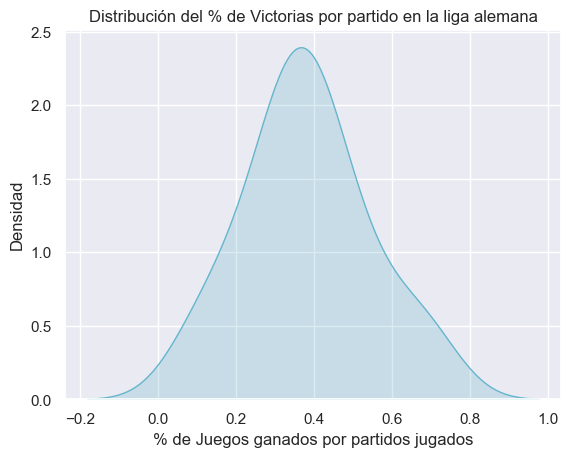

In [178]:
sns.set(style="darkgrid")
fig = sns.kdeplot(WinsxGame_GER, fill=True, color="c")
plt.title("Distribución del % de Victorias por partido en la liga alemana")
plt.xlabel("% de Juegos ganados por partidos jugados")
plt.ylabel("Densidad")

In [174]:
print('La media % de juevos ganados por partidos jugados en alemania es de  '+ str(round(WinsxGame_GER.mean(),4)))

La media % de juevos ganados por partidos jugados en alemania es de  0.3807


### 2. Demostrar que las muestras tienen la misma Varianza
Como las dos muestras siguen una distribución normal, se puede utilizar el test F de Fisher para comparar si las dos muestras tienen la misma varianza. Si las muestras no siguen una distribución normal se puede utilizar el test de Levene.

> Ho: **Hipótesis nula:** Las varianzas son iguales. (Muestras: xGD/90 y WinsxGame )

> H1: **Hipótesis alternativa:** Las varianzas NO son iguales.

In [175]:
# Realizar el test F de Fisher
f_value, p_value = f_oneway(xGD_90_GER, WinsxGame_GER)

print("Estadística F:", f_value)
print("Valor p:", p_value)

alpha = 0.05  # 5%

# Verificar si se acepta o rechaza la hipótesis nula
if p_value < alpha:
    print("Se rechaza la hipótesis nula; las varianzas de las muestras son significativamente diferentes.")
else:
    print("Se acepta la hipótesis nula; no hay suficiente evidencia para concluir que las varianzas de las muestras son diferentes.")


Estadística F: 6.58906976923484
Valor p: 0.01483381180133714
Se rechaza la hipótesis nula; las varianzas de las muestras son significativamente diferentes.


**Debido a que no las varianzas no son iguales, no se puede utilizar el test de Pearson. Utilizaremos el test de Kendall.**

## Test de correlación de Kendall  para verificar si son variables dependientes o independientes ( xGD/90 vs WinsxGame)

### Planteamiento de Hipótesis

> Ho: **Hipótesis nula:** Las dos muestras son independientes. ( xGD/90 vs WinsxGame)

> H1: **Hipótesis alternativa:** Las dos muestras son dependientes. ( xGD/90 vs WinsxGame)

In [180]:
from scipy.stats import kendalltau
stat, p = kendalltau(xGD_90_GER, WinsxGame_GER)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.793, p=0.000
Probably dependent


### **Al realizar el test de correlacion de kendalls (alpha= 0.05) el resultado indica que hay las dos variables son dependientes una de otra.**   
Para observar mejor esta relación graficaremos las dos variables.

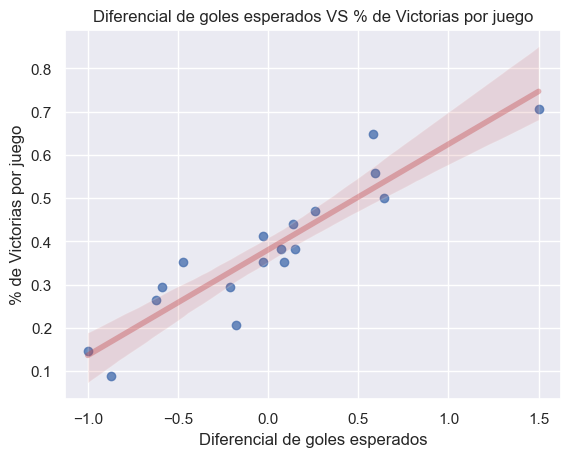

In [191]:
# plot
sns.regplot(x=xGD_90_GER, y=WinsxGame_GER, line_kws={"color":"r","alpha":0.4,"lw":4})
plt.title("Diferencial de goles esperados VS % de Victorias por juego")
plt.xlabel("Diferencial de goles esperados")
plt.ylabel("% de Victorias por juego")
plt.show()

#### La gráfica nos confirma la relación lineal positiva que existe entre las variables ( xGD/90 vs WinsxGame ). El equipo que tiene mayor diferencial de goles tiene más probabilida de ganar y por lo contrario si generalmente esperas recibir más goles el porcentaje de victorias no será muy alto.

<div class="alert alert-block alert-info">
<b>EXERCICI 3 </b> Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. </div>

En el tercer ejercicio nos piden analizar 3 variables, para esto se realizara una regresion multiple. Una suposición inicial es que con más goles a favor y menos en contra el equipo debería tener más puntos. Por lo tanto se eligen tres variables:

* Pts/G (Variable dependiente)
* GF (agregamos una columna donde relacional los goles a favor por partido) la llamaremos GFxPartido (Variable independiente)
* GA (agregamos una columna donde relacional los goles en contrar por partido) la llamaremos GAxPartido (Variable independiente)
  

In [205]:
ligasEU['GFxPartido'] = ligasEU.GF / ligasEU.MP
ligasEU['GAxPartido'] = ligasEU.GA / ligasEU.MP
ligasEU

,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,WinsxGame,GFxPartido,GAxPartido
Rk,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,52739,0.756757,2.594595,0.648649
2,Liverpool,ENG,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,53367,0.722222,2.472222,0.666667
3,Real Madrid,ESP,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,40624,0.702703,2.162162,0.837838
4,Bayern Munich,GER,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,0.705882,2.852941,1.088235
5,Paris S-G,FRA,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,41188,0.675676,2.297297,0.972973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,22083,0.135135,1.297297,2.405405
95,Venezia,ITA,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,6705,0.162162,0.918919,1.864865
96,Watford,ENG,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,20614,0.162162,0.891892,2.027027


**Se procede a realizar una regresion multiple** 

In [211]:
import statsmodels.api as sm

# especificar la variable dependiente y las variables independientes
y = ligasEU['Pts/G']
X = ligasEU[['GFxPartido', 'GAxPartido']]

modelo = sm.OLS(y, sm.add_constant(X)).fit() # ajustar el modelo de regresión múltiple

print(modelo.summary()) # resumen del modelo

# calcular el coeficiente de determinación (R²)
r2 = modelo.rsquared
print('Coeficiente de determinación (R²):', r2)
print('*********************************************************************')



                            OLS Regression Results                            
Dep. Variable:                  Pts/G   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     619.6
Date:                Tue, 02 May 2023   Prob (F-statistic):           3.12e-55
Time:                        16:48:14   Log-Likelihood:                 70.504
No. Observations:                  98   AIC:                            -135.0
Df Residuals:                      95   BIC:                            -127.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3154      0.087     15.104      0.0

La ecuación resultante se puede expresar de la siguiente manera:
   > **Pts/G = 1.3154 + 0.6021 * GFxPartido - 0.5632 * GAxPartido**

Lo que nos indica una relacion lineal positiva por GFxPartido y una relacion lineal negativa por GAxPartido. Lo cual era lógico pensar por que a mayor goles deberían ser más puntos y a menos goles también más puntos. Ahora procedemos a comprobarlo mediante el test F. 

El coeficiente de 'GFxPartido' es 0.6021, indica si 'GFxPartido' aumenta en una unidad, entonces 'Pts/G' aumenta en 0.6021 unidades, manteniendo constante 'GAxPartido'.
El coeficiente de 'GAxPartido' es -0.5632, indica si 'GAxPartido' aumenta en una unidad, entonces 'Pts/G' disminuye en 0.5632 unidades, manteniendo constante 'GFxPartido'.

## Test F

### Planteamiento de Hipótesis

> Ho: **Hipótesis nula:** No hay relación significativa entre las variables independientes y la variable dependiente.

> H1: **Hipótesis alternativa:** Existe una relación significativa entre las variables independientes y la variable dependiente. 

In [210]:
# realizar un test F
f_test = modelo.f_test('GFxPartido = GAxPartido = 0')
print('Test F:')
print(f_test)
print('*********************************************************************')


Test F:
<F test: F=619.582548051883, p=3.1218818044488114e-55, df_denom=95, df_num=2>
*********************************************************************


El p-Value es muy bajo, casi 0, por lo cual se rechaza la hipotesis nula y se acepta la alternativa. En conclusión:  
> **Existe una relación significativa entre las variables independientes y la variable dependiente**
    
Para observar este resultado de una mejor manera realizamos una gráfica de 3 dimensiones, debido a que son 3 variables.

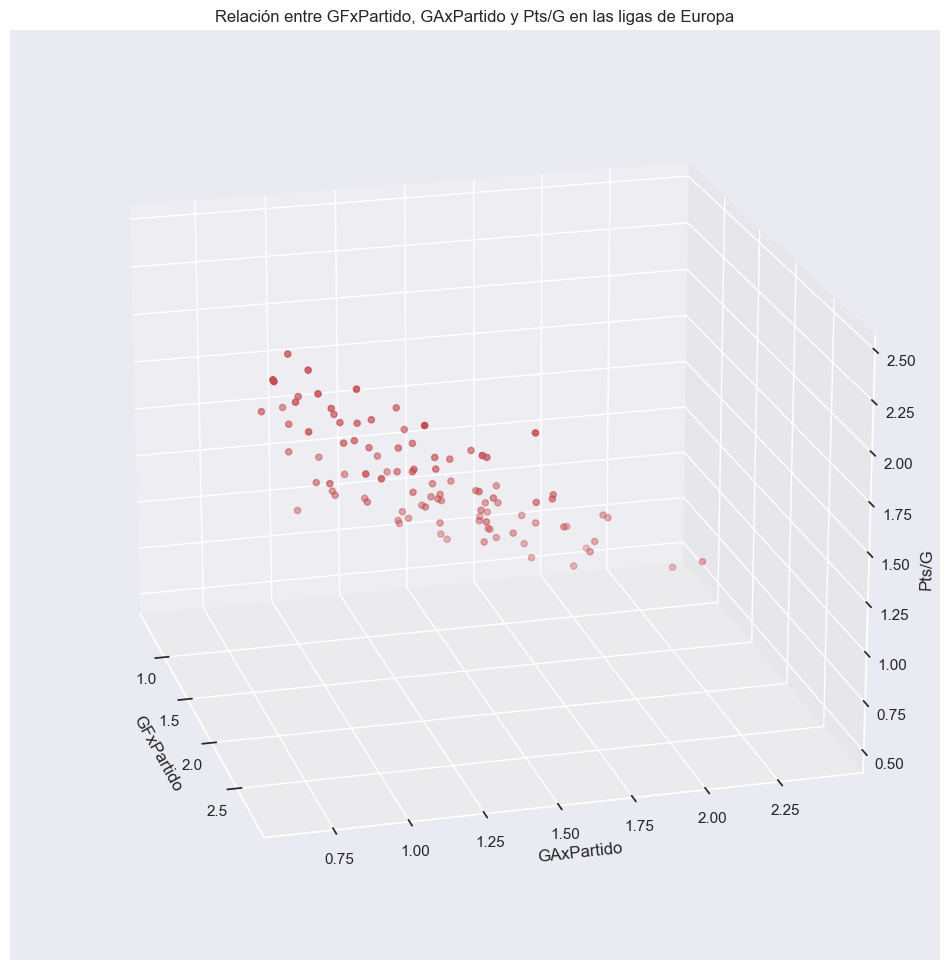

In [241]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 14))

ax = fig.add_subplot(111, projection='3d')

x = ligasEU['GFxPartido']
y = ligasEU['GAxPartido']
z = ligasEU['Pts/G']

ax.scatter(x, y, z, c='r', marker='o')
ax.set_title('Relación entre GFxPartido, GAxPartido y Pts/G en las ligas de Europa')
ax.set_xlabel('GFxPartido')
ax.set_ylabel('GAxPartido')
ax.set_zlabel('Pts/G')

ax.view_init(elev=20, azim=-15)


plt.show()


En la gráfica en 3D con esta vista, se puede observar como entre menos goles en contra más valores encontraremos en el eje Z. Ahora bien hay pocos equipos con un GAxPartido y alto GFxPartido, es lógico pensar ya que estos equipos seguramente seran los equipos líderes, la mayoría, son equipos con goles a favor y goles en contra equilibrados.